In [46]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

from helper import show_image, load_image
np.set_printoptions(threshold=100000)

## Working with Images using Numpy

An image is basically a numpy array with the shape as (height, width, channels). The channels are Red, Green and Blue. You can understand images as numpy arrays with each pixel represented by numbers denoting the extent of Red, Green and Blue required for the color. 

![alt text](numpy_images_shape.png)

Shape of the image array is (200, 150, 3)


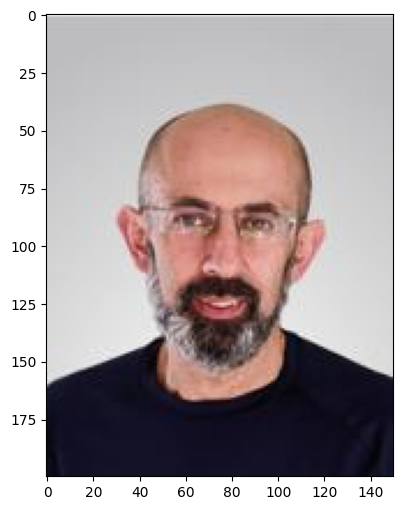

In [47]:
# Load the great astronomer's picture
im = Image.open('pavlos_image.jpg') 
# Store the picture as numpy arrays
data = np.array(im)

# Print the shape of the array
print(f'Shape of the image array is {data.shape}')

# Take a look at the image
plt.figure(figsize=(6,6));
plt.imshow(im);

In [48]:
# Take a look at the image array
# print(data)
print("Hello")

Hello


## 1.1 Crop Image

### 1.1.1 Crop the image in the specified boundaries such that resultant shape is (150,150)  using Numpy slicing operation. 

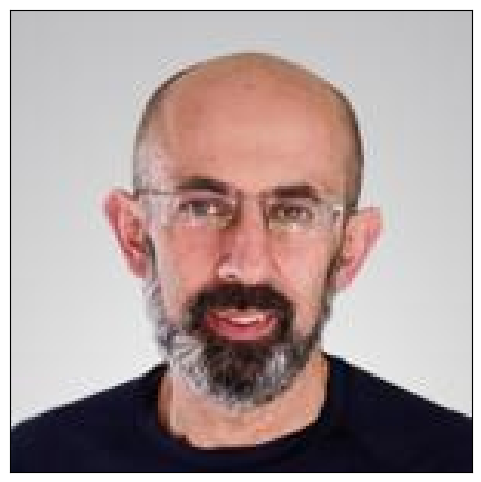

In [49]:
### edTest(test_1) ###
## DO NOT REMOVE ABOVE LINE ##

# Crop the image using slicing - play with the values to get the necessary crop 
# Slice the height from 25 to 175
cropped_img = data[25:175, : ]

# Take a look at the image
plt.figure(figsize=(6,6))
show_image(cropped_img);

### 1.1.2 What you did was a brute force method of cropping an image. Let us now generalize it. 
Define a function called `center_crop` that automatically crops the center portion of any image you give along.

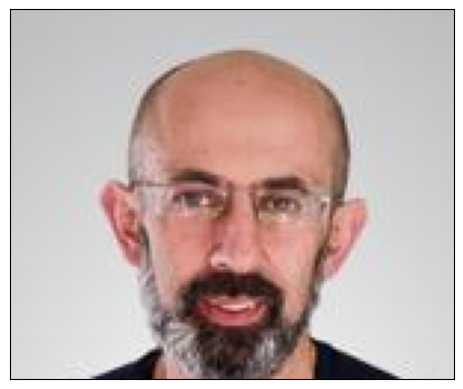

In [50]:
### edTest(test_2) ###
## DO NOT REMOVE ABOVE LINE ##

# Function that takes in parameters: 
# img: img object, 
# out_x: output X dimension expected, 
# out_y: output Y dimension expected

def crop_center(img,out_x,out_y):
    
    # Get the image shape and store in the variables y, x,channels
    y, x, channels = img.shape
    
    # Divide y by 2 (floor division using '//') 
    # and subtract from it [out_y divided by 2] 
    # (floor division using '//') 
    starty = (y//2) - (out_y//2)
    
    # Divide x by 2 (floor division using '//') 
    # and subtract from it [out_x divided by 2]
    # (floor division using '//') 
    startx = (x//2) -(out_x//2)
    
    #return sliced img from starty to starty + out_y and 
    # from startx to startx+out_x
    return img[starty:out_y, startx:out_x]

# Take a look at a cropped centered image with 
# out_x and out_y dimensions as 150 & 150 respectively
cropped_img_center = crop_center(data,150,150)
show_image(cropped_img_center);

## 1.2 Flip the image horizontally

Flip the cropped image (stored within `cropped_img`) horizontally i.e it needs to be a mirrored image- Use only slicing operations. 

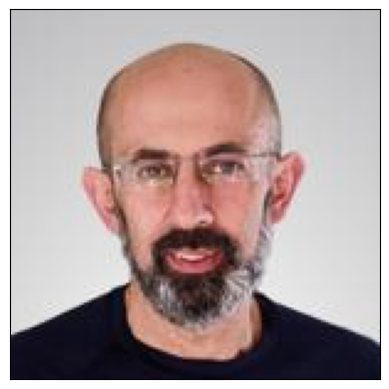

In [51]:
### edTest(test_3) ###
## DO NOT REMOVE ABOVE LINE ##

# Store the dimensions of cropped_img in variables y, x, channels
y, x, channels = cropped_img.shape

# Reverse the x values (Hint ::-1) and 
# take the y values and channels as it is
flipped_img = cropped_img[:, :: -1,:]

# Take a look at a flipped image
show_image(flipped_img);

## 1.3 Make the image Black and White i.e Grayscale

To make a grayscale image, calculate the mean across the color channels and display the array accordingly.

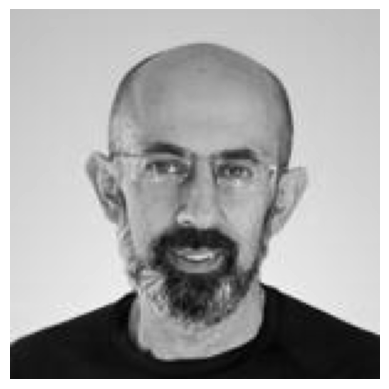

In [52]:
### edTest(test_4) ###
## DO NOT REMOVE ABOVE LINE ##

# Function that takes in img object and returns mean across color channels
def rgb2gray(img):
    # Perform average across the channels - remember that the LAST AXIS is the color channels 
    return np.mean(img,  axis =-1)

# Apply the function on the cropped image
grayscale_img = rgb2gray(cropped_img)

# Display the image
plt.axis("off")
plt.imshow(grayscale_img, cmap="gray");

## 1.4 The Great Astronomer's favorite shirt color

Create a function that changes the Great Astronomer's shirt color. You can do this by replacing the shirt color with Red, Green, and Blue values corresponding to the color you want to change it to.

In [53]:
# Create a function that takes in 
# input img, rval:red channel numbers, gval: green channel numbers, bval: blue channel numbers
def change_shirt_color(img, rval, gval , bval):
    # Extract the red channel, green channel and blue channel and store in individual variables
    # 'r', 'g' and 'b' respectively
    img=img.copy()
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    
    # We are creating a mask such that it selects the Great Astronomer's t-shirt
    # The range of RGB values of t-shirt's black color 
    # is red <=23, green <= 30 and blue <=45
    
    mask = (r<=23) & (g<=30) & (b<=45)

    # Apply the mask to the image
    # Replace it with rval, gval & bval
    img[mask] = [rval, gval, bval]
    
    #return img
    return img

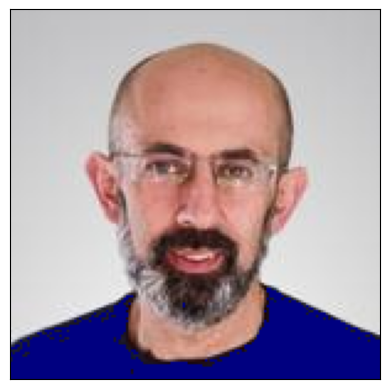

In [54]:
### edTest(test_5) ###
## DO NOT REMOVE ABOVE LINE ##

# Make Professor's shirt Navy Blue
# Apply the function with the necessary color channel values

blue_shirt=change_shirt_color(cropped_img, 0, 0, 128)
show_image(blue_shirt)

## 1.5 Change the background color of The Great Astronomer's image

Create a function that changes the background color of Great Astronomer's image. You can do this by replacing the background color with Red, Green, and Blue values corresponding to the color you want to change it to.

In [55]:
# Create a function that takes in 
# input img, rval:red channel numbers, gval: green channel numbers, bval: blue channel numbers

def change_background_color(img, rval, gval, bval):
    # Extract the red channel, green channel and blue channel and store in individual variables
    # 'r', 'g' and 'b' respectively
    img=img.copy()
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    
    # Create a mask that selects the grey background
    mask= ((r<=240) & (r>185)) & ((g<=240) & (g>185)) & ((b<=240) & (b>185))

    # Apply the mask to the image
    # Replace it with rval, gval & bval
    img[mask] = [rval, gval, bval]
    
    #return img
    return img

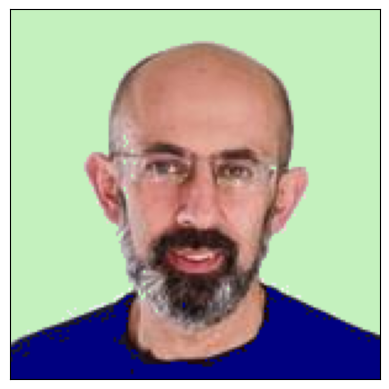

In [56]:
### edTest(test_6) ###
## DO NOT REMOVE ABOVE LINE ##

# Change background color of Blue shirt image to tea green
# Apply the function with the necessary color channel values

tea_greenBG_shirt=change_background_color(blue_shirt,196, 241, 190)
show_image(tea_greenBG_shirt)

## 1.6 The professor on vacation

Replace the background of the Great Astronomer's image to a picture of beach. You can do this by creating a mask that selects the grey background and use it to replace all the background pixels with their corresponding pixels from background image.

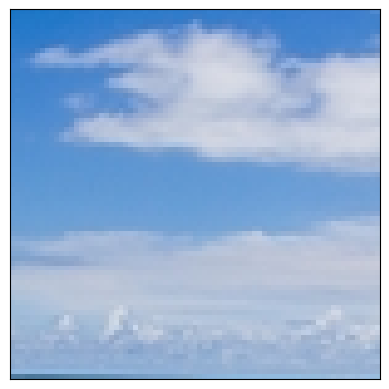

Shape of the cropped background image is (75, 75, 3)


In [57]:
# Load the background image
bg_image = Image.open('bg_image.jpg')

# Store the picture as a numpy array
bg_array = np.array(bg_image)

# Crop the background image such that both images are of same shape (150x150)
cropped_bg=crop_center(bg_array, 150, 150)
show_image(cropped_bg)
print(f'Shape of the cropped background image is {cropped_bg.shape}')

In [58]:
### edTest(test_7) ###
## DO NOT REMOVE ABOVE LINE ##

# Extract the red channel, green channel and blue channel of cropped_img and store in individual variables
# 'r', 'g' and 'b' respectively 
r, g, b = cropped_img[:,:,0], cropped_img[:,:,1], cropped_img[:,:,2]

# create a mask that selects the grey background in the professors image
# We have to create a mask such that it selects the grey colored background
mask_background= ((r<=240) & (r>185) ) & ((g<=240) & (g>185)) & ((b<=240) & (b>185))

#use the mask to replace all the background pixel values in professors image with pixel values from our desired background image
cropped_img[mask_background] = cropped_bg[mask_background]

show_image(cropped_img)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 75 but corresponding boolean dimension is 150